In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train_df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_df=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
train_df.sample(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
19849,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33941,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df['label'].nunique()

10

In [5]:
train_df['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [6]:
test_df.sample(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_df.isna().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

## Plotting the image

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
type(train_df)

pandas.core.frame.DataFrame

In [10]:
numpa=np.array(train_df.iloc[:,1:])

In [11]:
numpa.shape

(42000, 784)

## reshapping the array to 28x28 for plotting it

In [12]:
numpa=numpa.reshape(42000,28,28)

In [13]:
numpa[1].shape

(28, 28)

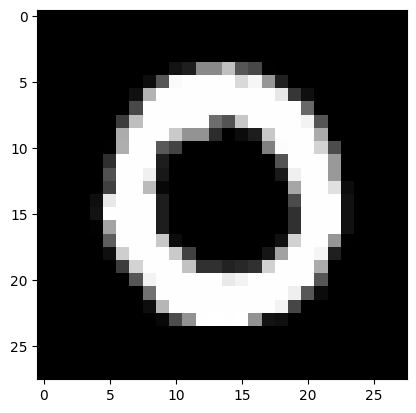

In [14]:
plt.imshow(numpa[1],cmap='gray')

In [15]:
train_df.iloc[1,0]

0

## creating datasets for training

In [16]:
train_x=train_df.drop(columns=['label'],axis=1)
train_y=train_df['label']

In [17]:
train_x.shape

(42000, 784)

In [18]:
train_y.shape

(42000,)